# **Redes Neuronales Convolucionales**

Clasificación de imágenes de pacientes con Alzheimer y Controles.

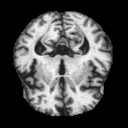

In [1]:
#Se descomprime el archivo "zip"

!unzip /content/alzheimers.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Dataset/Non_Demented/non_1395.jpg  
  inflating: Dataset/Non_Demented/non_1396.jpg  
  inflating: Dataset/Non_Demented/non_1397.jpg  
  inflating: Dataset/Non_Demented/non_1398.jpg  
  inflating: Dataset/Non_Demented/non_1399.jpg  
  inflating: Dataset/Non_Demented/non_14.jpg  
  inflating: Dataset/Non_Demented/non_140.jpg  
  inflating: Dataset/Non_Demented/non_1400.jpg  
  inflating: Dataset/Non_Demented/non_1401.jpg  
  inflating: Dataset/Non_Demented/non_1402.jpg  
  inflating: Dataset/Non_Demented/non_1403.jpg  
  inflating: Dataset/Non_Demented/non_1404.jpg  
  inflating: Dataset/Non_Demented/non_1405.jpg  
  inflating: Dataset/Non_Demented/non_1406.jpg  
  inflating: Dataset/Non_Demented/non_1407.jpg  
  inflating: Dataset/Non_Demented/non_1408.jpg  
  inflating: Dataset/Non_Demented/non_1409.jpg  
  inflating: Dataset/Non_Demented/non_141.jpg  
  inflating: Dataset/Non_Demented/non_1410.jpg  
  inflating:

In [4]:
#Separamos los datos en 3 conjuntos de datos, un 80% train, 10% test y 10% validacion.
!pip install split-folders 
import splitfolders
splitfolders.ratio('/content/Dataset', output="output", seed=1337, ratio=(.8, 0.1,0.1))

train_path = '/content/output/train'
test_path = '/content/output/test'
val_path = '/content/output/val'

Copying files: 6400 files [00:00, 7091.15 files/s]


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

train = '/content/output/train'
test = '/content/output/test'


image_gen = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                              
                               )  

test_data_gen = ImageDataGenerator(rescale = 1./255)



train = image_gen.flow_from_directory(
    train,
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=50
                                      )

test = test_data_gen.flow_from_directory(
      test,
      target_size=(64, 64),
      color_mode='grayscale',shuffle=False,
      class_mode='sparse',
      batch_size=50
      )



Found 5119 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [6]:
#Observamos las clases que existen en nuestros datos
train.class_indices

{'Mild_Demented': 0,
 'Moderate_Demented': 1,
 'Non_Demented': 2,
 'Very_Mild_Demented': 3}

In [7]:
#Creamos el modelo con sus distintas capas y lo compilamos.
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 1]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [10]:
model.fit(train,
          epochs=30,
          validation_data=test)

Epoch 1/30
103/103 [==============================] - 99s 962ms/step - loss: 0.6967 - sparse_categorical_accuracy: 0.6804 - val_loss: 0.6950 - val_sparse_categorical_accuracy: 0.6760
Epoch 2/30
103/103 [==============================] - 99s 958ms/step - loss: 0.6700 - sparse_categorical_accuracy: 0.6906 - val_loss: 0.6512 - val_sparse_categorical_accuracy: 0.6931
Epoch 3/30
103/103 [==============================] - 98s 954ms/step - loss: 0.6321 - sparse_categorical_accuracy: 0.7160 - val_loss: 0.7432 - val_sparse_categorical_accuracy: 0.6620
Epoch 4/30
103/103 [==============================] - 99s 959ms/step - loss: 0.5917 - sparse_categorical_accuracy: 0.7363 - val_loss: 0.6154 - val_sparse_categorical_accuracy: 0.7399
Epoch 5/30
103/103 [==============================] - 100s 969ms/step - loss: 0.5680 - sparse_categorical_accuracy: 0.7511 - val_loss: 0.7647 - val_sparse_categorical_accuracy: 0.6651
Epoch 6/30
103/103 [==============================] - 99s 958ms/step - loss: 0.5392 

In [11]:
test_loss, test_accuracy = model.evaluate(test)

13/13 [==============================] - 3s 230ms/step - loss: 0.2502 - sparse_categorical_accuracy: 0.9159


In [12]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.9158878326416016


El modelo entrenado tiene una precision del 91%

[8.3600011e-14 2.3328678e-19 4.4972911e-02 9.5502704e-01]


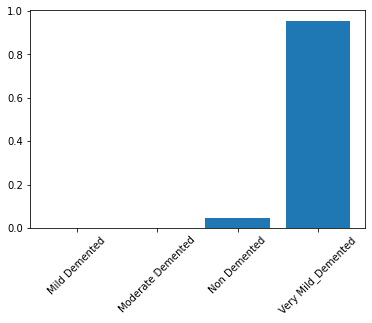

In [37]:
#Intentaremos predecir con el modelo datos nuevos, subiremos una imagen de un paciente con demencia "muy leve"

from keras.preprocessing import image
import requests
from io import *
import numpy as np
import matplotlib.pyplot as plt


hardik_path = '/content/verymild_6.jpg'

from tensorflow.keras.preprocessing import image

hardik_img = image.load_img(hardik_path, target_size=(64, 64),color_mode='grayscale')

# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)

#predict
hardik_preds= model.predict(pp_hardik_img)

pred_digits=np.argmax(hardik_preds,axis=1)
print(hardik_preds[0])
classes = np.arange(4)
plt.bar(classes, hardik_preds[0])
plt.xticks(classes,("Mild Demented","Moderate Demented", "Non Demented","Very Mild_Demented"),rotation=45)
plt.show()


[3.9720749e-13 5.4677414e-19 9.9999988e-01 7.7854246e-08]


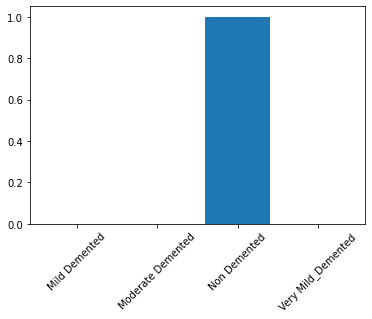

In [38]:
#Intentaremos predecir con el modelo datos nuevos, subiremos una imagen de una persona sin demencia

from keras.preprocessing import image
import requests
from io import *
import numpy as np
import matplotlib.pyplot as plt


hardik_path = '/content/non_23.jpg'

from tensorflow.keras.preprocessing import image

hardik_img = image.load_img(hardik_path, target_size=(64, 64),color_mode='grayscale')

# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)

#predict
hardik_preds= model.predict(pp_hardik_img)

pred_digits=np.argmax(hardik_preds,axis=1)
print(hardik_preds[0])
classes = np.arange(4)
plt.bar(classes, hardik_preds[0])
plt.xticks(classes,("Mild Demented","Moderate Demented", "Non Demented","Very Mild_Demented"),rotation=45)
plt.show()


[1.6172412e-11 9.9999928e-01 3.4218886e-09 7.3757326e-07]


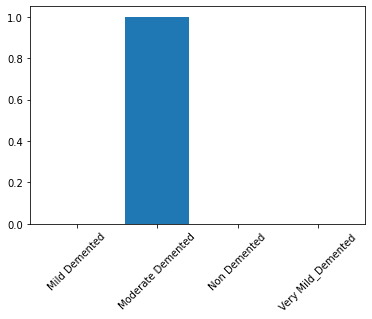

In [39]:
#Intentaremos predecir con el modelo datos nuevos, subiremos una imagen de un paciente con demencia moderada.


hardik_path = '/content/moderate_18.jpg'

from tensorflow.keras.preprocessing import image

hardik_img = image.load_img(hardik_path, target_size=(64, 64),color_mode='grayscale')

# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)

#predict
hardik_preds= model.predict(pp_hardik_img)

pred_digits=np.argmax(hardik_preds,axis=1)
print(hardik_preds[0])
classes = np.arange(4)
plt.bar(classes, hardik_preds[0])
plt.xticks(classes,("Mild Demented","Moderate Demented", "Non Demented","Very Mild_Demented"),rotation=45)
plt.show()


[9.9981040e-01 8.9193843e-13 1.7847528e-04 1.1234112e-05]


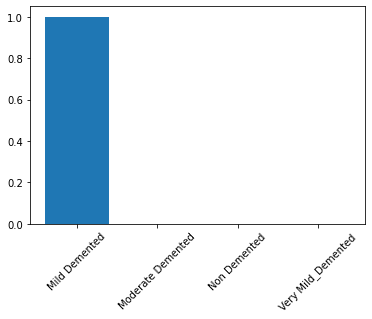

In [40]:
#Subiremos una imagen de un paciente con demencia leve.

hardik_path = '/content/mild_92.jpg'

from tensorflow.keras.preprocessing import image

hardik_img = image.load_img(hardik_path, target_size=(64, 64),color_mode='grayscale')

# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)

#predict
hardik_preds= model.predict(pp_hardik_img)

pred_digits=np.argmax(hardik_preds,axis=1)
print(hardik_preds[0])
classes = np.arange(4)
plt.bar(classes, hardik_preds[0])
plt.xticks(classes,("Mild Demented","Moderate Demented", "Non Demented","Very Mild_Demented"),rotation=45)
plt.show()

El modelo predice bastante bien nuevas imágenes, acertó en todas las imágenes que le pasamos anteriormente.